In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import f_classif, SelectKBest
from keras.models import Sequential
from keras.layers import LSTM, Dense

## Read data file

In [3]:
data = pd.read_csv('./wine.csv')

## Preprocessing

In [4]:
le =LabelEncoder()

le.fit(data['color'])

data['color']=le.transform(data['color'])


## 2. Use simple model to solve problem

In [5]:
X = data.drop('color', axis=1)
y = data['color']

In [6]:
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Gaussian Naive Bayes

In [14]:
model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("accuracy : ", accuracy_score(y_test, y_pred))


accuracy :  0.9686153846153847


## 3 . Recurrent Neutral Network

In [37]:
X_value = data.drop('color', axis=1).values
y_value = data['color'].values

In [38]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_value, y_value, test_size=0.2, random_state=42)

In [39]:
X_train_n = X_train_n.reshape((X_train_n.shape[0], 1, X_train_n.shape[1]))
X_test_n = X_test_n.reshape((X_test_n.shape[0], 1, X_test_n.shape[1]))

In [40]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train_n.shape[1], X_train_n.shape[2]), return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(2, activation='softmax'))

In [41]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
model.fit(X_train_n, y_train_n, epochs=50, batch_size=64, validation_data=(X_test_n, y_test_n))

Epoch 1/50
82/82 [==============================] - 5s 18ms/step - loss: 0.2809 - accuracy: 0.8901 - val_loss: 0.2022 - val_accuracy: 0.9269
Epoch 2/50
82/82 [==============================] - 1s 7ms/step - loss: 0.1618 - accuracy: 0.9438 - val_loss: 0.1630 - val_accuracy: 0.9362
Epoch 3/50
82/82 [==============================] - 1s 7ms/step - loss: 0.1340 - accuracy: 0.9525 - val_loss: 0.1449 - val_accuracy: 0.9415
Epoch 4/50
82/82 [==============================] - 1s 7ms/step - loss: 0.1136 - accuracy: 0.9621 - val_loss: 0.1223 - val_accuracy: 0.9538
Epoch 5/50
82/82 [==============================] - 1s 7ms/step - loss: 0.0941 - accuracy: 0.9704 - val_loss: 0.1043 - val_accuracy: 0.9638
Epoch 6/50
82/82 [==============================] - 1s 8ms/step - loss: 0.0832 - accuracy: 0.9731 - val_loss: 0.0889 - val_accuracy: 0.9685
Epoch 7/50
82/82 [==============================] - 1s 7ms/step - loss: 0.0946 - accuracy: 0.9690 - val_loss: 0.1082 - val_accuracy: 0.9646
Epoch 8/50
82/82 [=

In [43]:
loss, accuracy = model.evaluate(X_test_n, y_test_n)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

41/41 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9869
Test Loss: 0.0430
Test Accuracy: 0.9869


## 4. Overfitting

### Gaussian Naive Bayes

<Axes: >

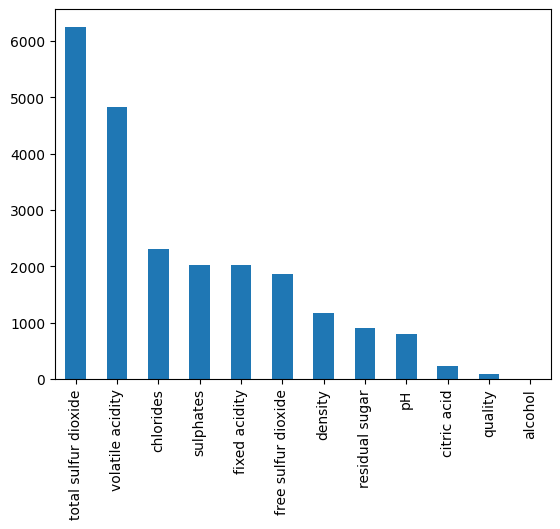

In [61]:
X = data.drop('color', axis=1)
y = data['color']

score = f_classif(X, y)

value = pd.Series(score[0], index=X.columns)
value.sort_values(ascending=False, inplace=True)
value.plot.bar()

#### Select 9 best attribute

In [64]:
selector = SelectKBest(f_classif, k = 9)
selector.fit(X,y)
cols_name = selector.get_support(indices=True)

X_train_new = X_train.iloc[:,cols_name]
X_test_new = X_test.iloc[:,cols_name]

#### Evaluate

In [65]:
model = GaussianNB()

model.fit(X_train_new, y_train)

y_pred = model.predict(X_test_new)

print("accuracy : ", accuracy_score(y_test, y_pred))

accuracy :  0.9673846153846154


### Recurrent Neutral Network

Để giảm overfitting , ta có thể giảm độ phức tạp của mô hình bằng cách giảm hidden layer , cũng như số neuron trên 1 layer, giảm epochs

Ở đây , ta sẽ bớt đi một hidden layer ở giữa

In [44]:
model_over = Sequential()
model_over.add(LSTM(128, input_shape=(X_train_n.shape[1], X_train_n.shape[2]), return_sequences=True))
model_over.add(LSTM(64))
model_over.add(Dense(2, activation='softmax'))

In [45]:
model_over.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
model_over.fit(X_train_n, y_train_n, epochs=25, batch_size=32, validation_data=(X_test_n, y_test_n))

Epoch 1/25
163/163 [==============================] - 5s 8ms/step - loss: 0.2238 - accuracy: 0.9159 - val_loss: 0.2120 - val_accuracy: 0.9246
Epoch 2/25
163/163 [==============================] - 1s 4ms/step - loss: 0.1563 - accuracy: 0.9444 - val_loss: 0.1508 - val_accuracy: 0.9454
Epoch 3/25
163/163 [==============================] - 1s 4ms/step - loss: 0.1203 - accuracy: 0.9552 - val_loss: 0.1078 - val_accuracy: 0.9623
Epoch 4/25
163/163 [==============================] - 1s 4ms/step - loss: 0.1005 - accuracy: 0.9669 - val_loss: 0.1291 - val_accuracy: 0.9577
Epoch 5/25
163/163 [==============================] - 1s 4ms/step - loss: 0.0861 - accuracy: 0.9721 - val_loss: 0.1117 - val_accuracy: 0.9600
Epoch 6/25
163/163 [==============================] - 1s 4ms/step - loss: 0.0759 - accuracy: 0.9769 - val_loss: 0.0789 - val_accuracy: 0.9777
Epoch 7/25
163/163 [==============================] - 1s 6ms/step - loss: 0.0758 - accuracy: 0.9750 - val_loss: 0.0748 - val_accuracy: 0.9723
Epoch 

In [47]:
loss, accuracy = model_over.evaluate(X_test_n, y_test_n)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

41/41 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9862
Test Loss: 0.0535
Test Accuracy: 0.9862


## 5. Improve the accuracy

### Gaussian NB

### Recurrent Neutral Network

Tăng accuracy bằng cách tăng epochs cũng như batch_size

In [48]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train_n.shape[1], X_train_n.shape[2]), return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(2, activation='softmax'))

In [49]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
model.fit(X_train_n, y_train_n, epochs=100, batch_size=512, validation_data=(X_test_n, y_test_n))

Epoch 1/100
11/11 [==============================] - 0s 24ms/step - loss: 0.0318 - accuracy: 0.9896 - val_loss: 0.0520 - val_accuracy: 0.9823
Epoch 2/100
11/11 [==============================] - 0s 20ms/step - loss: 0.0257 - accuracy: 0.9919 - val_loss: 0.0488 - val_accuracy: 0.9869
Epoch 3/100
11/11 [==============================] - 0s 20ms/step - loss: 0.0279 - accuracy: 0.9935 - val_loss: 0.0448 - val_accuracy: 0.9885
Epoch 4/100
11/11 [==============================] - 0s 26ms/step - loss: 0.0370 - accuracy: 0.9877 - val_loss: 0.0845 - val_accuracy: 0.9738
Epoch 5/100
11/11 [==============================] - 0s 24ms/step - loss: 0.0396 - accuracy: 0.9867 - val_loss: 0.0471 - val_accuracy: 0.9885
Epoch 6/100
11/11 [==============================] - 0s 20ms/step - loss: 0.0278 - accuracy: 0.9919 - val_loss: 0.0442 - val_accuracy: 0.9892
Epoch 7/100
11/11 [==============================] - 0s 21ms/step - loss: 0.0288 - accuracy: 0.9913 - val_loss: 0.0445 - val_accuracy: 0.9885
Epoch 

In [60]:
loss, accuracy = model.evaluate(X_test_n, y_test_n)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

41/41 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9915
Test Loss: 0.0390
Test Accuracy: 0.9915
